In [73]:
# Import lib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Data = pd.read_csv('riceseeds.csv')
#Choose 6 motil species
df = Data[Data['Species'].isin(['BC15','BQ10','NH92','NT16','PC10','VietHuong8'])]
df.shape
#df

(576, 264)

In [74]:
df.head()

,ID,Species,F1,F2,F3,F2/F3,F1/V,Eccentricity,7,8,...,253,254,255,256,257,258,259,260,261,262
0,1,BC15,0.26242,0.20654,0.17159,0.15826,0.13428,0.11743,0.10507,0.096976,...,0.53561,0.53988,0.53785,0.54262,14253,240.43,76.130,0.31664,0.038539,0.94855
1,2,BC15,0.31821,0.23118,0.18412,0.17612,0.14412,0.12382,0.10986,0.100490,...,0.51014,0.51328,0.51246,0.51035,12607,218.46,74.044,0.33894,0.039736,0.94081
2,3,BC15,0.32834,0.25076,0.19865,0.18694,0.15487,0.13260,0.11756,0.108020,...,0.54310,0.54311,0.54349,0.54735,12466,218.15,73.619,0.33747,0.040051,0.94134
3,4,BC15,0.27924,0.20974,0.17183,0.16021,0.13328,0.11572,0.10301,0.094112,...,0.53562,0.53882,0.53679,0.53728,12420,215.46,74.641,0.34644,0.041690,0.93807
4,5,BC15,0.32191,0.23589,0.19659,0.18134,0.14963,0.12903,0.11361,0.103620,...,0.52167,0.52311,0.52263,0.52652,13851,238.71,74.448,0.31187,0.038821,0.95012


In [108]:
X = df.values[:, 8:263]
Y = df.values[:, 1]
X.shape

(576, 255)

In [109]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 96)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [110]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 20)
X_train_pca = pca.fit_transform(X_train)

In [111]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier_pca = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [112]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 93.96551724137932)

In [113]:
X_test_pca = pca.transform(X_test)
classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [114]:
Y_pred_pca = classifier_pca.predict(X_test_pca)
print("Accuracy is"), accuracy_score(y_test,Y_pred_pca)*100

Accuracy is


(None, 89.65517241379311)

In [94]:
#from sklearn.svm import SVC

#svc = SVC()#kernel='linear')
#svc_pca = SVC()#kernel='linear')

#svc.fit(X_train, y_train)
#print(svc.score(X_test, y_test))

In [95]:
#X_test_pca = pca.transform(X_test)

#svc_pca.fit(X_train_pca, y_train)
#print(svc_pca.score(X_test_pca, y_test))

In [115]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(None, 98.27586206896551)

In [116]:
lda_pca = LDA(n_components = 2)
lda_pca.fit(X_train_pca, y_train)
Y_pred_pca = lda_pca.predict(X_test_pca)
print("Accuracy is"), accuracy_score(y_test,Y_pred_pca)*100

Accuracy is


(None, 99.13793103448276)

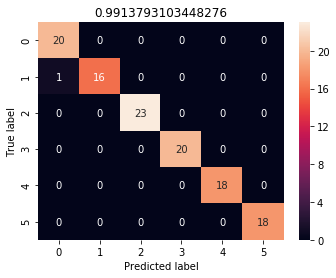

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test,Y_pred_pca) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred_pca)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [118]:
# Lấy 1->40 hạt đầu mỗi giống
df1 = pd.DataFrame(df.sort_values('ID', ascending = True).groupby('Species').head(40))
df1.shape

(240, 264)

In [119]:
X = df1.values[:, 8:263]
Y = df1.values[:, 1]

In [120]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 96)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [121]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 20)
X_train_pca = pca.fit_transform(X_train)

In [122]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier_pca = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [123]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 89.58333333333334)

In [124]:
X_test_pca = pca.transform(X_test)
classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [125]:
Y_pred_pca = classifier_pca.predict(X_test_pca)
print("Accuracy is"), accuracy_score(y_test,Y_pred_pca)*100

Accuracy is


(None, 87.5)

In [126]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(None, 97.91666666666666)

In [127]:
lda_pca = LDA(n_components = 2)
lda_pca.fit(X_train_pca, y_train)
Y_pred_pca = lda_pca.predict(X_test_pca)
print("Accuracy is"), accuracy_score(y_test,Y_pred_pca)*100

Accuracy is


(None, 100.0)

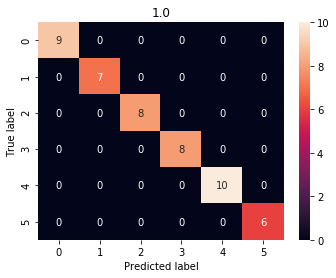

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test,Y_pred_pca) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred_pca)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()